### **Importar librerías**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# Metricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Cargar el dataset
df = pd.read_csv('CVD_cleaned.csv')

# Ver los primeros registros
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### **Análisis Exploratorio de Datos (EDA)**

In [3]:
# Ver la información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [3]:
# Ver la cantidad de valores nulos
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [4]:
# Ver cantidad de valores NaN
df.isna().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [4]:
# Ver la cantidad de valores únicos las variables categóricas
df.select_dtypes(include='object').nunique()

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [7]:
# Ver estadísticas descriptivas
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [3]:
# Configuración de gráficos
plt.rcParams['figure.figsize'] = (6, 4)

# Fuente Palatino Linotype
plt.rcParams['font.family'] = 'Palatino Linotype'

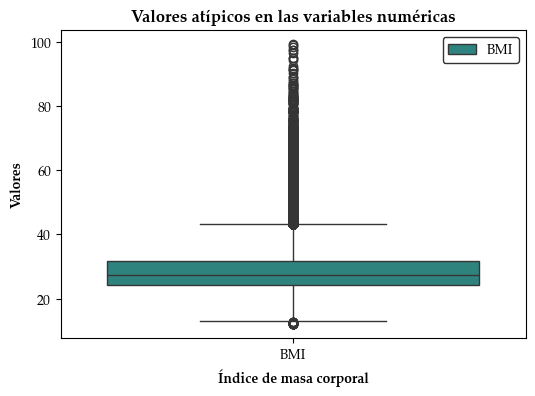

In [9]:
# Ver valores atípicos en las variables numéricas
sns.boxplot(data=df[['BMI']], palette='viridis')
plt.title('Valores atípicos en las variables numéricas', fontweight='bold')
# Eje x
plt.xlabel('Índice de masa corporal', fontweight='bold')
# Eje y
plt.ylabel('Valores', fontweight='bold')
# Leyenda
plt.legend(['BMI'], loc='best', frameon = True, facecolor = 'white', edgecolor = 'black')
plt.show()


In [10]:
# Ver los nombres de los valores unicos de General_Health
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [11]:
# Ver los nombres de los valores unicos de Checkup
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [12]:
# Ver los nombres de los valores unicos de Exercise
df['Exercise'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
# Ver los nombres de los valores unicos de Skin_Cancer
df['Skin_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Ver los nombres de los valores unicos de Other_Cancer
df['Other_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Ver los nombres de los valores unicos de Depression
df['Depression'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Ver los nombres de los valores unicos de Diabetes
df['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [17]:
# Ver los nombres de los valores unicos de Arthritis
df['Arthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
# Ver los nombres de los valores unicos de Sex
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
# Ver los nombres de los valores unicos de Age_Category
df['Age_Category'].unique()

# Ver los nombres de los valores unicos de Age Category organizado de menor a mayor
df['Age_Category'].value_counts().sort_index()

Age_Category
18-24    18681
25-29    15494
30-34    18428
35-39    20606
40-44    21595
45-49    20968
50-54    25097
55-59    28054
60-64    32418
65-69    33434
70-74    31103
75-79    20705
80+      22271
Name: count, dtype: int64

In [20]:
# Ver los nombres de los valores unicos de Smoking_History
df['Smoking_History'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
# Ver los nombres de los valores unicos de Heart_Disease
df['Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

### **Conversión de variables categóricas**

In [3]:
# Convertir manualmente las variables categóricas a numéricas

# General_Health
df['General_Health'] = df['General_Health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})

# Checkup 
df['Checkup'] = df['Checkup'].replace({'Within the past 2 years': 0, 'Within the past year': 1, 'Within the past 5 years': 2, '5 or more years ago': 3, 'Never': 4})

# Exercise
df['Exercise'] = df['Exercise'].replace({'No': 0, 'Yes': 1})

# Skin_Cancer
df['Skin_Cancer'] = df['Skin_Cancer'].replace({'No': 0, 'Yes': 1})

# Other_Cancer
df['Other_Cancer'] = df['Other_Cancer'].replace({'No': 0, 'Yes': 1})

# Depression
df['Depression'] = df['Depression'].replace({'No': 0, 'Yes': 1})

# Diabetes
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1, 'No, pre-diabetes or borderline diabetes': 2, 'Yes, but female told only during pregnancy': 3})

# Arthritis
df['Arthritis'] = df['Arthritis'].replace({'No': 0, 'Yes': 1})

# Sex
df['Sex'] = df['Sex'].replace({'Female': 0, 'Male': 1})

# Age_Category
df['Age_Category'] = df['Age_Category'].replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12})

# Smoking_History
df['Smoking_History'] = df['Smoking_History'].replace({'No': 0, 'Yes': 1})

# Heart_Disease
df['Heart_Disease'] = df['Heart_Disease'].replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_115660/2401284232.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['General_Health'] = df['General_Health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})
/tmp/ipykernel_115660/2401284232.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Checkup'] = df['Checkup'].replace({'Within the past 2 years': 0, 'Within the past year': 1, 'Within the past 5 years': 2, '5 or more years ago': 3, 'Never': 4})
/tmp/ipykernel_115660/2401284232.py:10: FutureWarning: Downcasting behavior in `re

In [5]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,1,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


### **Resolver desbalance de clases**

In [6]:
# Resolver el desbalanceo de clases
# Conteo de las clases
df['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [8]:
# Instalar imblearn.over_sampling import SMOTE
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Ver todas las variables
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from sklearn.impute import SimpleImputer

# Supongamos que tu DataFrame se llama df y contiene todas las columnas mencionadas
# 'Heart_Disease' es la variable objetivo

# Separar características (X) y la variable objetivo (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir las variables
multiclass_vars = ['General_Health', 'Checkup', 'Diabetes', 'Age_Category']
binary_vars = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History', 'Alcohol_Consumption']
continuous_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Imputación para variables continuas
imputer_continuous = SimpleImputer(strategy='mean')
X_train[continuous_vars] = imputer_continuous.fit_transform(X_train[continuous_vars])

# Imputación para variables multiclase
imputer_multiclass = SimpleImputer(strategy='most_frequent')
X_train[multiclass_vars] = imputer_multiclass.fit_transform(X_train[multiclass_vars])

# Imputación para variables binarias
imputer_binary = SimpleImputer(strategy='most_frequent')
X_train[binary_vars] = imputer_binary.fit_transform(X_train[binary_vars])

# Comprobar si hay valores NaN en X_train o y_train antes de SMOTE
print("Valores NaN en X_train antes de SMOTE:", X_train.isnull().sum().sum())
print("Valores NaN en y_train antes de SMOTE:", y_train.isnull().sum())

# Sobremuestreo de las variables multiclase con SMOTE
smote_multiclass = SMOTE(random_state=42)
X_resampled_multiclass, y_resampled_multiclass = smote_multiclass.fit_resample(X_train, y_train)

# Convertir los resultados en DataFrame
X_resampled_multiclass_df = pd.DataFrame(X_resampled_multiclass, columns=X_train.columns)
y_resampled_multiclass_df = pd.DataFrame(y_resampled_multiclass, columns=['Heart_Disease'])

# Asegúrate de que las longitudes de X y y coincidan
print("Tamaño después de SMOTE:", X_resampled_multiclass_df.shape, "y", y_resampled_multiclass_df.shape)

# Sobremuestreo de variables binarias con RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled_binary, y_resampled_binary = ros.fit_resample(X_resampled_multiclass_df[binary_vars], y_resampled_multiclass)

# Sobremuestreo de variables continuas con ADASYN
adasyn = ADASYN(random_state=42)
X_resampled_continuous, y_resampled_continuous = adasyn.fit_resample(X_resampled_multiclass_df[continuous_vars], y_resampled_multiclass)

# Combina los resultados
X_final = pd.concat([pd.DataFrame(X_resampled_binary, columns=binary_vars),
                     pd.DataFrame(X_resampled_continuous, columns=continuous_vars),
                     pd.DataFrame(X_resampled_multiclass_df[multiclass_vars], columns=multiclass_vars)], axis=1)

y_final = pd.Series(y_resampled_binary)  # asumiendo que la variable objetivo está alineada

# Validar tamaños finales
print("Tamaño final de X:", X_final.shape)
print("Tamaño final de y:", y_final.shape)

# Asegúrate de que ambos tamaños coincidan
if len(X_final) != len(y_final):
    raise ValueError("Las longitudes de X y y no coinciden después del sobremuestreo.")

Valores NaN en X_train antes de SMOTE: 0
Valores NaN en y_train antes de SMOTE: 0
Tamaño después de SMOTE: (397564, 18) y (397564, 1)
Tamaño final de X: (397564, 18)
Tamaño final de y: (397564,)


In [5]:
# Convertir X_final y y_final en un DataFrame
df_final = pd.concat([X_final, y_final], axis=1)

# Mostrar el DataFrame final
print(df_final.head())

   Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  Sex  \
0       0.0          0.0           0.0         0.0        0.0  0.0   
1       1.0          0.0           0.0         0.0        1.0  0.0   
2       1.0          0.0           0.0         0.0        0.0  0.0   
3       1.0          0.0           0.0         0.0        0.0  1.0   
4       1.0          0.0           0.0         0.0        0.0  0.0   

   Smoking_History  Alcohol_Consumption  Height_(cm)  Weight_(kg)    BMI  \
0              0.0                 20.0        168.0        65.77  23.40   
1              1.0                 20.0        173.0        86.18  28.89   
2              1.0                  1.0        170.0        64.86  22.40   
3              0.0                  0.0        173.0       110.22  36.95   
4              0.0                  5.0        160.0        48.08  18.78   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  \
0                7.0                       

In [6]:
# Ver forma de df_final
print("Forma del DataFrame final:", df_final.shape)

Forma del DataFrame final: (397564, 19)


In [7]:
# Ver conteo de la variable objetivo de df_final
print("Conteo de la variable objetivo:", df_final['Heart_Disease'].value_counts())

Conteo de la variable objetivo: Heart_Disease
0    198782
1    198782
Name: count, dtype: int64


In [10]:
# Ver conteo de la variable Age_Categoria de df_final
print("Conteo de la variable Age_Category:", df_final['Age_Category'].value_counts())

Conteo de la variable Age_Category: Age_Category
10    59321
9     58730
8     49656
11    45126
7     36871
12    28852
6     27193
5     19666
4     17833
3     15847
2     13837
0     13348
1     11284
Name: count, dtype: int64


In [11]:
# Ver conteo de la variable Sex de df_final
print("Conteo de la variable Sex:", df_final['Sex'].value_counts())

Conteo de la variable Sex: Sex
1.000000    196365
0.000000    165861
0.859453         1
0.883723         1
0.633372         1
             ...  
0.763118         1
0.600730         1
0.657010         1
0.272850         1
0.257903         1
Name: count, Length: 35340, dtype: int64


In [40]:
df_final.columns

Index(['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis',
       'Sex', 'Smoking_History', 'Alcohol_Consumption', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health', 'Checkup', 'Diabetes', 'Age_Category',
       'Heart_Disease'],
      dtype='object')

### **Selección y entrenamiento del modelo**

### **Redes neuronales**

In [12]:
# Entrenar un modelo de clasificion simple con redes neuronales MLP
from sklearn.neural_network import MLPClassifier

# Seleccionar caracteristicas y variable objetivo
X = df_final.drop('Heart_Disease', axis=1)
y = df_final['Heart_Disease']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las caracteristicas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Crear el modelo
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predecir en el conjunto de prueba
X_test = scaler.transform(X_test)
y_pred = mlp.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9160727760543305
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     59606
           1       0.95      0.88      0.91     59664

    accuracy                           0.92    119270
   macro avg       0.92      0.92      0.92    119270
weighted avg       0.92      0.92      0.92    119270



### **Random Forest**

In [13]:
# Entrenar con un modelo de random forest
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rfc = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
rfc.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rfc.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9537268382661189
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     59606
           1       0.99      0.92      0.95     59664

    accuracy                           0.95    119270
   macro avg       0.96      0.95      0.95    119270
weighted avg       0.96      0.95      0.95    119270



### **Mas modelos**

In [15]:
df_final.columns

Index(['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis',
       'Sex', 'Smoking_History', 'Alcohol_Consumption', 'Height_(cm)',
       'Weight_(kg)', 'BMI', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'General_Health', 'Checkup', 'Diabetes', 'Age_Category',
       'Heart_Disease'],
      dtype='object')

In [8]:
# Entrenar con un modelo diferente
from sklearn.ensemble import GradientBoostingClassifier

# Seleccionar caracteristicas y variable objetivo
X = df_final.drop('Heart_Disease', axis=1)
y = df_final['Heart_Disease']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las caracteristicas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Crear el modelo
gbc = GradientBoostingClassifier(n_estimators=100)

# Entrenar el modelo
gbc.fit(X_train, y_train)

# Predecir en el conjunto de prueba
X_test = scaler.transform(X_test)
y_pred = gbc.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9382493502138006
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     59606
           1       0.98      0.89      0.94     59664

    accuracy                           0.94    119270
   macro avg       0.94      0.94      0.94    119270
weighted avg       0.94      0.94      0.94    119270

